In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_cleaned = pd.read_csv("train_cleaned.csv")
test_cleaned = pd.read_csv("test_cleaned.csv")

In [3]:
train_cleaned.head()

,Pclass,Age,SibSp,Parch,Fare,HasCabin,Sex_male,Embarked_Q,Embarked_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Survived
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,3.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [4]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   HasCabin    891 non-null    float64
 6   Sex_male    891 non-null    float64
 7   Embarked_Q  891 non-null    float64
 8   Embarked_S  891 non-null    float64
 9   Deck_B      891 non-null    float64
 10  Deck_C      891 non-null    float64
 11  Deck_D      891 non-null    float64
 12  Deck_E      891 non-null    float64
 13  Deck_F      891 non-null    float64
 14  Deck_G      891 non-null    float64
 15  Deck_T      891 non-null    float64
 16  Deck_U      891 non-null    float64
 17  Survived    891 non-null    int64  
dtypes: float64(17), int64(1)
memory usage: 125.4 KB


[2.723e+01 4.644e-01 3.227e-01 1.683e+00 8.819e+00 6.900e+01 9.270e+01
 1.085e-02 5.489e+00 2.588e+01 1.094e+01 1.949e+01 1.814e+01 2.947e+00
 2.282e-01 6.230e-01 2.049e+01]
[[1.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [1.  0.  0.  0. ]
 [0.  1.  0.  0. ]
 [1.  0.  1.  0. ]
 [1.  0.  1.  0. ]
 [0.  1.  1.  0. ]
 [1.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [0.5 0.  0.  0. ]
 [1.  1.  0.  0. ]
 [0.  1.  0.  0. ]
 [1.  0.  1.  0. ]
 [1.  0.  1.  0. ]
 [1.  0.  0.  0. ]
 [0.5 0.  0.  0. ]
 [1.  0.  1.  0. ]]

Top 4 đặc trưng được chọn: ['Pclass', 'HasCabin', 'Sex_male', 'Deck_B']


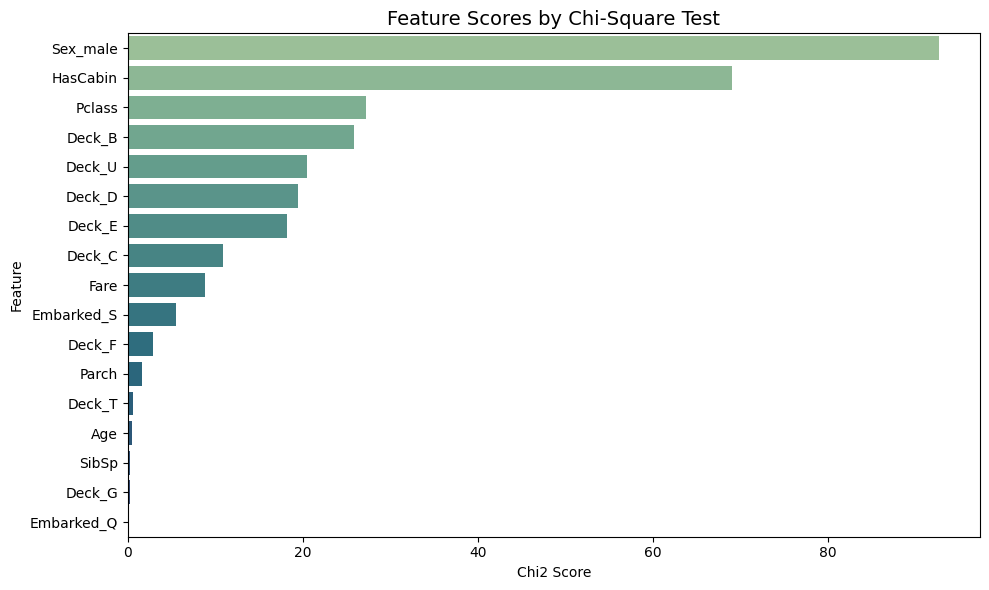

In [7]:
# Trích xuất đặc trưng (Feature Extraction) bằng phương pháp Chi-squared
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Tải data
filename = 'train_cleaned.csv'
names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G','Deck_T', 'Deck_U', 'Survived']
dataframe = read_csv(filename)

# Chia dữ liệu thành biến đầu vào (X) và biến mục tiêu (Y)
array = dataframe.values
X = array[:,0:17]
Y = array[:,17]

# Chuẩn hóa dữ liệu về khoảng [0,1] để phép tính Chi2 hoạt động chính xác
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Chọn đặc trưng tốt nhất bằng kiểm định Chi-squared (chọn 4 đặc trưng có điểm cao nhất)
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# In ra điểm số Chi2 của từng đặc trưng
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

# Lấy ra dữ liệu của 4 đặc trưng được chọn
print(features[0:17,:])

# In thêm tên cột được chọn
selected_features = dataframe.columns[:-1][fit.get_support()]
print("\nTop 4 đặc trưng được chọn:", list(selected_features))

featureScores = pd.DataFrame({
    'Specs': dataframe.columns[:-1],
    'Score': fit.scores_
})

# Vẽ biểu đồ CHI-SQUARE FEATURE SCORES
plt.figure(figsize=(10,6))
sns.barplot(
    data=featureScores.sort_values(by="Score", ascending=False),
    x="Score",
    y="Specs",
    hue="Specs",           
    legend=False,
    palette="crest"
)
plt.title("Feature Scores by Chi-Square Test", fontsize=14)
plt.xlabel("Chi2 Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Chi-square đưa ra những đặc trưng Sex_male , HasCabin , Pclass , Deck_B

Num Features: 4
Selected Features (True = được chọn): [ True  True  True False False False  True False False False False False
 False False False False False]
Feature Ranking (1 = quan trọng nhất): [ 1  1  1 12  7 10  1 13  3 14  9  4  2  6 11  5  8]

Top 3 đặc trưng được chọn: ['Pclass', 'Age', 'SibSp', 'Sex_male']


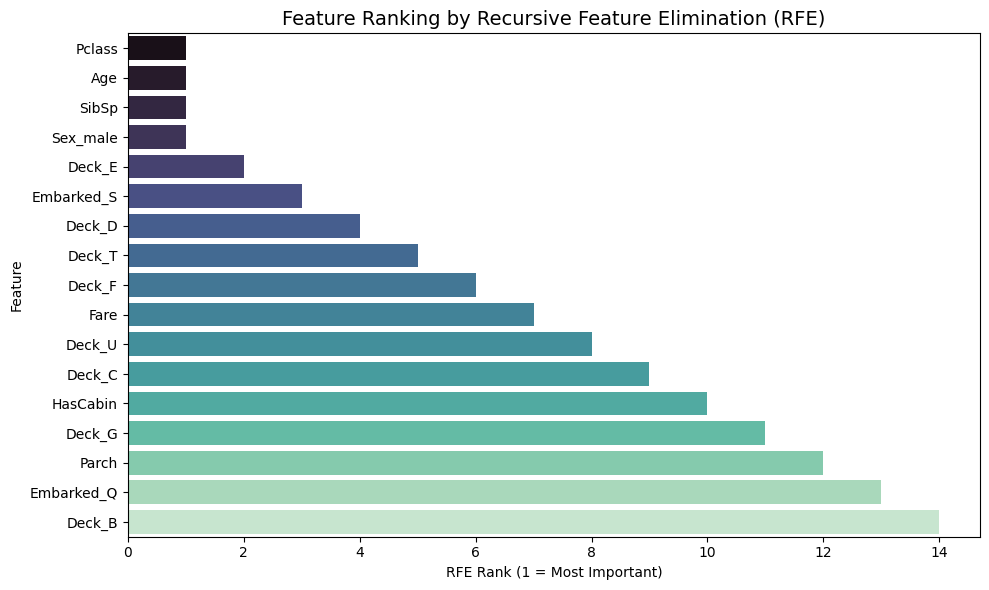

In [8]:
# Trích xuất đặc trưng (Feature Extraction) bằng phương pháp RFE 
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Tải data
filename = 'train_cleaned.csv'
names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G','Deck_T', 'Deck_U', 'Survived']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:, 0:17]
Y = array[:, 17]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Trích xuất đặc trưng 
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=4)
fit = rfe.fit(X, Y)

# Kết quả
print(f"Num Features: {fit.n_features_}")
print(f"Selected Features (True = được chọn): {fit.support_}")
print(f"Feature Ranking (1 = quan trọng nhất): {fit.ranking_}")

# In tên cột tương ứng
selected_features = dataframe.columns[:-1][fit.support_]
print("\nTop 3 đặc trưng được chọn:", list(selected_features))

# Vẽ biểu đồ RFE RANKING
plt.figure(figsize=(10,6))
rfe_ranks = pd.DataFrame({
    "Feature": dataframe.columns[:-1],
    "Rank": rfe.ranking_
}).sort_values(by="Rank", ascending=True)
sns.barplot(data=rfe_ranks, x="Rank", y="Feature",hue="Feature",legend=False, palette="mako")
plt.title("Feature Ranking by Recursive Feature Elimination (RFE)", fontsize=14)
plt.xlabel("RFE Rank (1 = Most Important)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


#### RFE đưa ra những đặc trưng Pclass , Age , SibSp , Sex_male

Explained Variance Ratio: [9.282e-01 7.070e-02 4.419e-04]

PCA Components (vector weights cho từng đặc trưng):
[[-9.286e-03  2.744e-02  3.485e-03  3.477e-03  9.995e-01  4.092e-03
  -1.742e-03 -6.630e-04 -1.457e-03  1.740e-03  1.828e-03  3.797e-04
   2.045e-04 -8.106e-05 -3.458e-05  1.696e-06 -4.092e-03]
 [-2.063e-02  9.989e-01 -2.760e-02 -1.422e-02 -2.751e-02  6.703e-03
   5.613e-03  3.762e-05  8.926e-05  9.691e-04  1.978e-03  1.745e-03
   1.517e-03 -5.941e-04 -3.418e-04  9.176e-05 -6.703e-03]
 [ 8.887e-02  3.322e-02  9.004e-01  4.156e-01 -4.335e-03 -3.428e-02
  -3.738e-02 -5.994e-03  5.725e-02 -1.877e-02 -4.121e-03 -2.275e-03
  -4.188e-03 -2.085e-03 -8.030e-05 -2.830e-04  3.428e-02]]


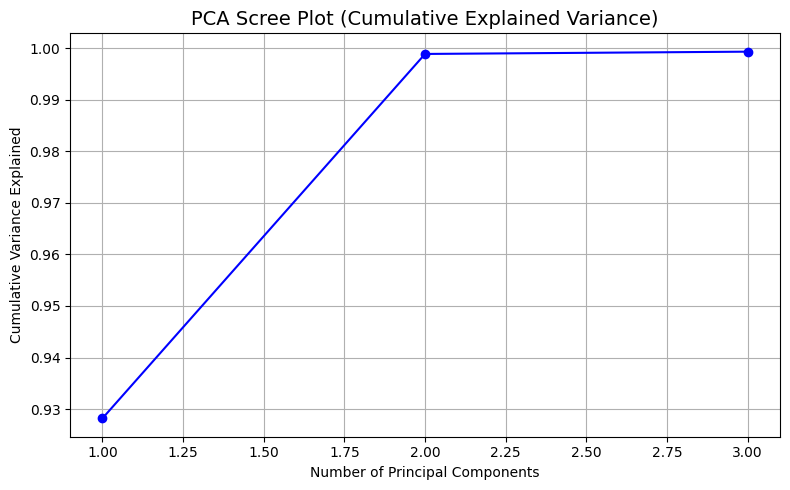

In [9]:
# Trích xuất đặc trưng (Feature Extraction) bằng phương pháp PCA
from pandas import read_csv
from sklearn.decomposition import PCA

# Tải data
filename = 'train_cleaned.csv'
names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G','Deck_T', 'Deck_U', 'Survived']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:, 0:17]
Y = array[:, 17]

# Trích xuất đặc trưng
pca = PCA(n_components=3)
fit = pca.fit(X)

# Tóm tắt các thành phần chính
print("Explained Variance Ratio:", fit.explained_variance_ratio_)
print("\nPCA Components (vector weights cho từng đặc trưng):")
print(fit.components_)

# Vẽ biểu đồ PCA SCREE PLOT
plt.figure(figsize=(8,5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o', color='b'
)
plt.title("PCA Scree Plot (Cumulative Explained Variance)", fontsize=14)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid(True)
plt.tight_layout()
plt.show()


#### PCA đưa ra những đặc trưng 
Thành phần chính 1 (PC1) giải thích ≈ 92.82% phương sai của dữ liệu.

Thành phần chính 2 (PC2) giải thích ≈ 7.07%.

Thành phần chính 3 (PC3) gần như không đáng kể (0.04%).

Tổng cộng 2 thành phần đầu đã giải thích ~99.89% thông tin của dữ liệu → chứng tỏ dữ liệu  có thể được rút gọn còn 2 chiều mà vẫn giữ gần như toàn bộ thông tin.

#### Giải thích các thành phần PCA

| Thành phần | Đặc trưng nổi bật nhất | Giải thích |
|-------------|------------------------|-------------|
| **PC1** | Fare (0.9995) | Biến **Fare** gần như chi phối toàn bộ PC1 → giá vé là đặc trưng có phương sai lớn nhất |
| **PC2** | Age (0.999) | **Tuổi (Age)** chiếm ưu thế trong thành phần thứ hai, thể hiện biến thiên lớn độc lập với Fare |
| **PC3** | SibSp (0.9004), Parch (0.4156) | Các đặc trưng **SibSp** và **Parch** (số anh chị em, cha mẹ/con đi cùng) có đóng góp lớn trong thành phần thứ ba |


[0.078 0.245 0.045 0.04  0.209 0.028 0.268 0.009 0.022 0.009 0.005 0.005
 0.009 0.002 0.002 0.001 0.024]


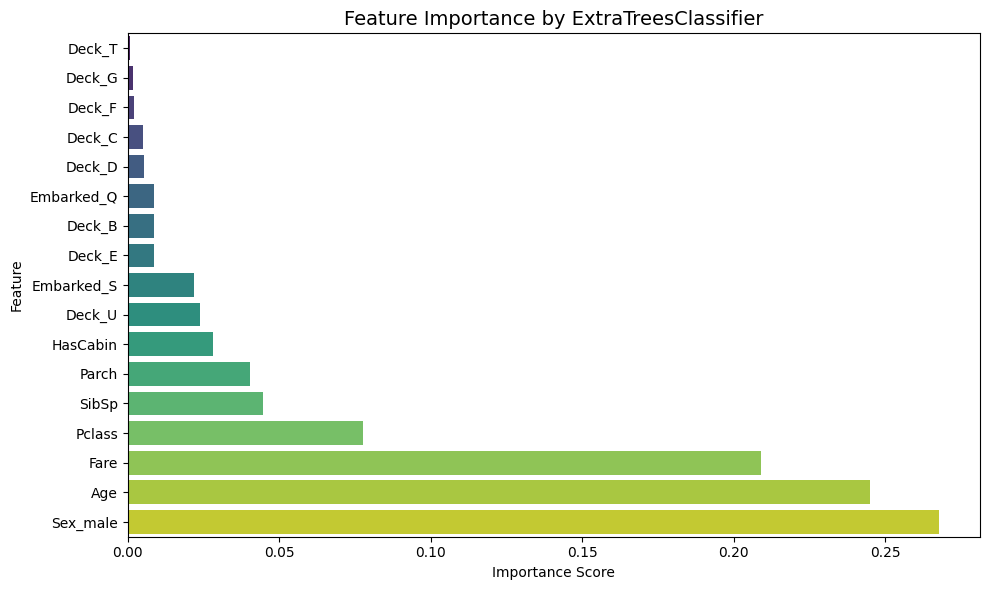

In [ ]:
# Trích xuất đặc trưng bằng phương pháp Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# Tải data
filename = 'train_cleaned.csv'
names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G','Deck_T', 'Deck_U', 'Survived']
dataframe = read_csv(filename)
array = dataframe.values
X = array[:, 0:17]
Y = array[:, 17]

# Trích xuất đặc trưng
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
importances = model.feature_importances_
indices = np.argsort(importances)
feature_names = dataframe.columns[:-1]  
importance_df = pd.DataFrame({
    "Feature": np.array(feature_names)[indices],
    "Importance": importances[indices]
})

# Vẽ biểu đồ độ quan trọng của đặc trưng
plt.figure(figsize=(10,6))
sns.barplot(
    data=importance_df,
    x="Importance",
    y="Feature",
    hue="Feature",
    legend=False,
    palette="viridis"
)
plt.title("Feature Importance by ExtraTreesClassifier", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### ExtraTreesClassifier đưa ra những đặc trưng Sex_male , Age , Fare 

## Kết thúc 